### Project description
The online store Ice sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.
    
We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

### Importing libraries

In [1]:
import pandas as pd
!pip install sidetable
import sidetable as stb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from functools import reduce
from scipy import stats
pd.options.display.float_format = '{:.2f}'.format


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


### Reading and studying the data

In [4]:
data=pd.read_csv('dataset/games.csv')

In [3]:
data
data.info()
data.describe()

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii          2006.00        Sports   
1                  Super Mario Bros.      NES          1985.00      Platform   
2                     Mario Kart Wii      Wii          2008.00        Racing   
3                  Wii Sports Resort      Wii          2009.00        Sports   
4           Pokemon Red/Pokemon Blue       GB          1996.00  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3          2016.00        Action   
16711               LMA Manager 2007     X360          2006.00        Sports   
16712        Haitaka no Psychedelica      PSV          2016.00     Adventure   
16713               Spirits & Spells      GBA          2003.00      Platform   
16714            Winning Post 8 2016      PSV          2016.00    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45         76.00          8   
1         29.08      3.58      6.81         0.77           nan        NaN   
2         15.68     12.76      3.79         3.29         82.00        8.3   
3         15.61     10.93      3.28         2.95         80.00          8   
4         11.27      8.89     10.22         1.00           nan        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           nan        NaN   
16711      0.00      0.01      0.00         0.00           nan        NaN   
16712      0.00      0.00      0.01         0.00           nan        NaN   
16713      0.01      0.00      0.00         0.00           nan        NaN   
16714      0.00      0.00      0.01         0.00           nan        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Year_of_Release  NA_sales  EU_sales  JP_sales  Other_sales  \
count         16446.00  16715.00  16715.00  16715.00     16715.00   
mean           2006.48      0.26      0.15      0.08         0.05   
std               5.88      0.81      0.50      0.31         0.19   
min            1980.00      0.00      0.00      0.00         0.00   
25%            2003.00      0.00      0.00      0.00         0.00   
50%            2007.00      0.08      0.02      0.00         0.01   
75%            2010.00      0.24      0.11      0.04         0.03   
max            2016.00     41.36     28.96     10.22        10.57   

       Critic_Score  
count       8137.00  
mean          68.97  
std           13.94  
min           13.00  
25%           60.00  
50%           71.00  
75%           79.00  
max           98.00

In [4]:
data.duplicated().sum()
data.stb.missing(style=True)

0

#### Conclusion

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    It's great that you checked for duplicates in the dataset and made sure there were none.  I like that you use a variety of methods when studying general information in table. Good job!</div>    

The initial dataset is comprised of 16,715 rows and 11 columns. We can see that we'll need to normalize column names. We identified missing values (up to 51%) in different columns and we found no duplicates. The data types are mostly OK except for Year_of_release and User_score columns.

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

Often students try to find the release year - for example, looking for the year in the title of the game using lemmatization.
    
No need to scold them for it, but you can give advice:
    
immediately remove such a small proportion of gaps to save time;
    
check the result - not always 4 digits in the game name indicate the year of release.
    
Filling gaps in years with mean/median/minimum, etc. values is considered a gross mistake, we mark it with a red comment.

    
</div>

### Preparing the data

#### Lowering headers case and dealing with the missing values

In [5]:
data.columns=data.columns.str.lower()
data['year_of_release']=data['year_of_release'].fillna(0).astype('int')
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score']=data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Very well that you converted the columns to lower case using <code>str.lower()</code> 

Agree with your decision not to fill the missing values with the median, for example. But in this case we can just remove missing values :)</div>  

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

Successful solutions are the following:
    
entering a unreal value(-1,-999999, etc);
    
leaving the gaps unchanged.
    
The second option can potentially lead to problems when analyzing games by region, we need to track this down.

Deleting rows with gaps in the Rating column is considered a gross mistake, we mark it with a red comment. Explanation for the student: "This way our dataset will become much poorer, losing more than a third of the lines that contain information about sales, release date, and platform. The data in these columns will be useful for finding answers to all questions in the assignment, while the rating information is needed for only one question."
    
    
An attempt to restore the rating by "replacing all gaps with one rating value, for example, E" is considered a gross mistake, we mark it with a red comment. Instead of explaining, I ask the student: "Why do you think that such a replacement is appropriate?"
    
An attempt to fill in the gaps in a more complex way - for example, splitting games into groups by genre and filling in the gaps with the most popular value of every genre - should be marked with a yellow comment.
    
Explanation for the student: "You did a great job filling the gaps.But sometimes the gap itself constitutes valuable information.What countries was the ESRB system created for?Will the authors of the local market games in other countries try to get an ESRB rating?"


</div>

In [6]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

Successful solutions for handling gaps in columns with reviews of critics / users are the following:
entering a unreal value;
    
leaving the gaps unchanged.
    
The first option could potentially lead to problems when analyzing the impact of reviews on sales, you need to track this.
Deleting rows with gaps in the Reviews columns is considered a gross mistake, we mark it with a red comment. Explanation for the student: "This way our dataset will become much poorer, losing more than a third of the lines that contain information about sales, release date, and platform.  The data in these columns will be useful for completing the major part of the assignment.  Besides, the newest games usually don't have reviews - and their sales information is the most valuable."
    
    
An attempt to fill in the gaps by "replacing all gaps with a median / mean value for the entire dataset" is considered a gross mistake, we mark it with a red comment. Instead of explaining, I ask the student: "Why do you think that such a replacement is appropriate?"

An attempt to fill in the gaps in a more complex way - for example, splitting games into groups by genre and filling in the gaps with the mean / median value of every genre - should be marked with a yellow comment.
    
Explanation for the student: "You did a great job filling the gaps.But such a significant proportion of gaps can hardly be correctly restored from the available values."
    
    
    


</div>

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

Almost no one replaces rare options with analogues - therefore you can give the following advice as developmental feedback: "Look at how often different rating values occur. Perhaps rare values can be replaced with more common ones.
Or, if they make up a negligible fraction of the data, they can be deleted."
    
    
Important - the student can make this substitution later in the project: before evaluating the impact of the ESRB rating on sales in a particular region.

    
    
    


</div>

#### Calculating total sales revenue

In [7]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.nlargest(5,['total_sales'])
data.info()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45         76.00        8.00      E   
1      3.58      6.81         0.77           nan         nan    NaN   
2     12.76      3.79         3.29         82.00        8.30      E   
3     10.93      3.28         2.95         80.00        8.00      E   
4      8.89     10.22         1.00           nan         nan    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
   
   `total_sales` is calculated correctly. Thanks for using `sum(axis=1)`. This way your code looks more professionally.
    
 
</div>   


<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>
    
Typically students don't use the games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1) construction - you can mention it as a tip.


    
    
    


</div>

#### Conclusion

We lowered the case for headers and changed data type for Year_of_release column.
We dealt with the missing values in the following way:

   *Year_of_release*: We don't have many missing values here so we changed them to zero as it doesn't affect the results of our analysis.
   
   *Critic_score*: there's nothing we can do to fill it in so we leave the missing values as they are.
   
   *User_score*: again there's nothing we can do to fill in missing values or values for games where rating is pending ('tbd'). We changed 'tbd' values to 'NaN' in order to change data type leave is as it is.

We leave the other missing values as they are because those are object data types that we can not fill in. Still they might not have any visible impact on the results of our analysis.

Finally we calculated Total_sales column as requested.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
Thanks for the detailed conclusions!</div> 

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

Frequent gross mistakes, red comment:
    
forgetting about the tbd value;
    
deleting lines with tdb;
    
handling gaps and tdb in different ways.


Make sure that the student has provided data types in the critic_score, user_score, year_of_release columns - otherwise, we mark it as a gross mistake, a red comment, or a yellow comment, depending on the number of other mistakes.
Obviously, if the entire project is already highlighted in red, then there is no point in converting a float into an int.
   
    
    


</div>

### Analyzing the data

#### Looking at games releases

In [8]:
df_count=data[
    ['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='name').reset_index(
)
df_count=df_count[df_count['year_of_release']!=0]

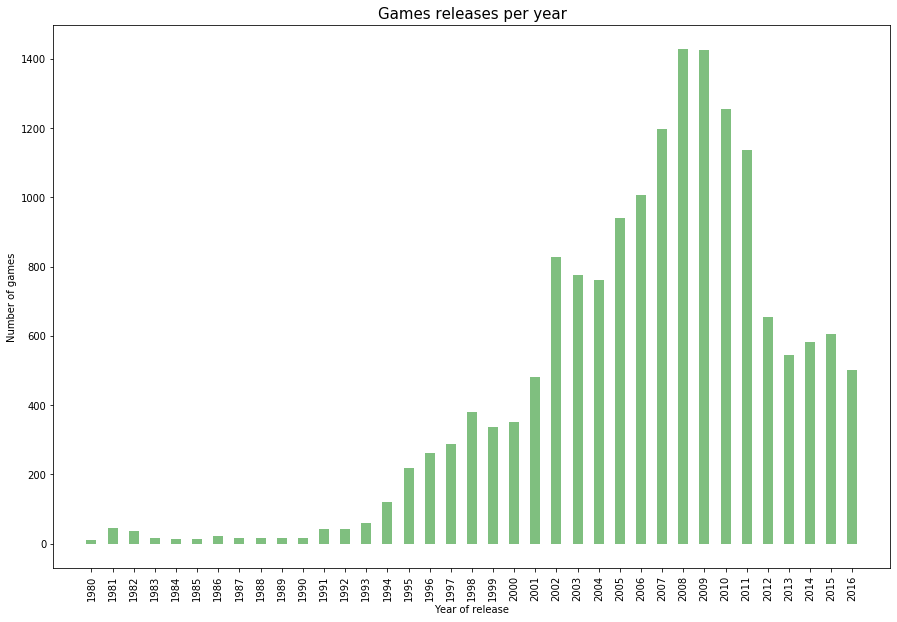

In [9]:
fig,ax=plt.subplots(figsize=(15,10))
ax.vlines(x=df_count.year_of_release, ymin=0, ymax=df_count.name, alpha=0.5, linewidth=10, color='green')
ax.set_title('Games releases per year', size=15)
ax.set_ylabel('Number of games')
ax.set_xlabel('Year of release')
ax.set_xticks(df_count.year_of_release)
ax.set_xticklabels(df_count.year_of_release, rotation=90);

**Comment:**
*The graph shows the amount of games released per year. We can see a rapid growth in late 90's with a peack in late 2008-2009 and stagnation in 2010's.*

#### Looking at sales distribution

In [10]:
df_sales=data[['platform','total_sales']].groupby(
    ['platform']).sum().sort_values(by='total_sales').reset_index(
)
df_sales['z_score']=(df_sales['total_sales']-df_sales['total_sales'].mean())/df_sales['total_sales'].std()
df_sales['color']=['red' if x<0 else 'green' for x in df_sales['z_score']]
df_sales

platform  total_sales  z_score  color
0      PCFX         0.03    -0.83    red
1        GG         0.04    -0.83    red
2       3DO         0.10    -0.83    red
3      TG16         0.16    -0.83    red
4        WS         1.42    -0.82    red
5        NG         1.44    -0.82    red
6       SCD         1.86    -0.82    red
7        DC        15.95    -0.78    red
8       GEN        30.77    -0.74    red
9       SAT        33.59    -0.73    red
10      PSV        54.07    -0.67    red
11     WiiU        82.19    -0.59    red
12     2600        96.98    -0.55    red
13     XOne       159.32    -0.37    red
14       GC       198.93    -0.25    red
15     SNES       200.04    -0.25    red
16      N64       218.68    -0.20    red
17      NES       251.05    -0.10    red
18       GB       255.46    -0.09    red
19       XB       257.74    -0.09    red
20      3DS       259.00    -0.08    red
21       PC       259.52    -0.08    red
22      PSP       294.05     0.02  green
23      PS4       314.14     0.08  green
24      GBA       317.85     0.09  green
25       PS       730.86     1.27  green
26       DS       806.12     1.49  green
27      Wii       907.51     1.78  green
28      PS3       939.65     1.87  green
29     X360       971.42     1.96  green
30      PS2      1255.77     2.78  green

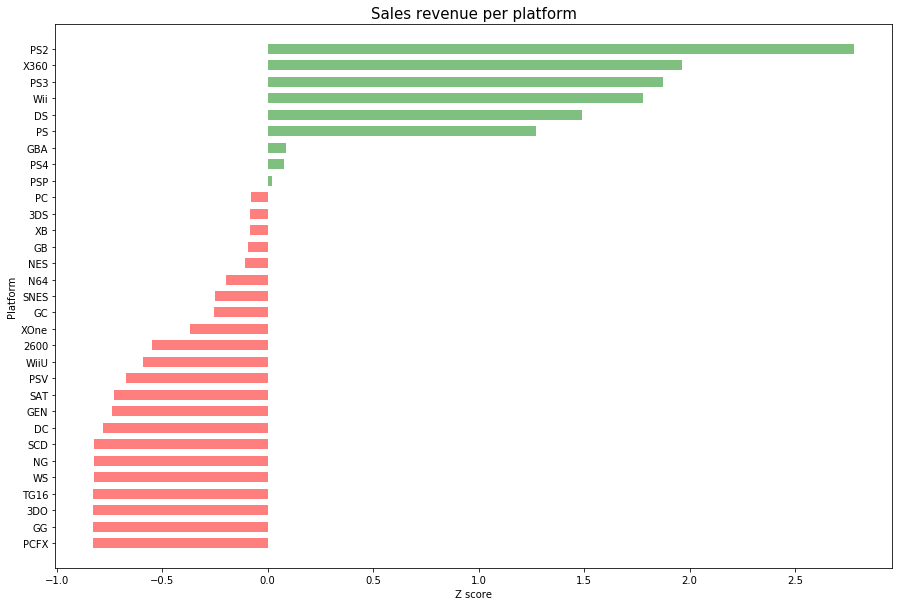

In [11]:
plt.figure(figsize=(15,10))
plt.hlines(
    y=df_sales.platform, xmax=df_sales.z_score, xmin=0, color=df_sales.color, linewidth=10, alpha=0.5
)
plt.ylabel('Platform')
plt.xlabel('Z score')
plt.title('Sales revenue per platform', size=15);

**Comment:**
*Here we can see most profitable platforms (green) and less profitable (red). We calculated z_score to show how far each platform revenue is from overall mean value (z-score=0).*

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
   Wow, it's really great that you use the z-score for the determining of the most dominant platforms for the whole period 👏 👏 👏   </div>

#### Looking at platforms lifetime

In [12]:
df_lifetime=pd.pivot_table(
    data, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0
)
df_lifetime = df_lifetime.iloc[1: , :]
df_lifetime

platform         2600  3DO   3DS   DC     DS    GB   GBA    GC   GEN   GG  \
year_of_release                                                             
1980            11.38 0.00  0.00 0.00   0.00  0.00  0.00  0.00  0.00 0.00   
1981            35.68 0.00  0.00 0.00   0.00  0.00  0.00  0.00  0.00 0.00   
1982            28.88 0.00  0.00 0.00   0.00  0.00  0.00  0.00  0.00 0.00   
1983             5.84 0.00  0.00 0.00   0.00  0.00  0.00  0.00  0.00 0.00   
1984             0.27 0.00  0.00 0.00   0.00  0.00  0.00  0.00  0.00 0.00   
1985             0.45 0.00  0.00 0.00   0.02  0.00  0.00  0.00  0.00 0.00   
1986             0.67 0.00  0.00 0.00   0.00  0.00  0.00  0.00  0.00 0.00   
1987             1.94 0.00  0.00 0.00   0.00  0.00  0.00  0.00  0.00 0.00   
1988             0.74 0.00  0.00 0.00   0.00  1.43  0.00  0.00  0.00 0.00   
1989             0.63 0.00  0.00 0.00   0.00 64.97  0.00  0.00  0.00 0.00   
1990             0.00 0.00  0.00 0.00   0.00  4.89  0.00  0.00  2.60 0.00   
1991             0.00 0.00  0.00 0.00   0.00  5.57  0.00  0.00  4.33 0.00   
1992             0.00 0.00  0.00 0.00   0.00 25.49  0.00  0.00 12.64 0.04   
1993             0.00 0.00  0.00 0.00   0.00  0.00  0.00  0.00  3.07 0.00   
1994             0.00 0.02  0.00 0.00   0.00 12.18  0.00  0.00  8.13 0.00   
1995             0.00 0.08  0.00 0.00   0.00  3.60  0.00  0.00  0.00 0.00   
1996             0.00 0.00  0.00 0.00   0.00 36.03  0.00  0.00  0.00 0.00   
1997             0.00 0.00  0.00 0.00   0.00  6.37  0.00  0.00  0.00 0.00   
1998             0.00 0.00  0.00 3.38   0.00 26.90  0.00  0.00  0.00 0.00   
1999             0.00 0.00  0.00 5.16   0.00 38.00  0.00  0.00  0.00 0.00   
2000             0.00 0.00  0.00 5.99   0.00 19.76  0.07  0.00  0.00 0.00   
2001             0.00 0.00  0.00 1.07   0.00  9.24 61.53 26.34  0.00 0.00   
2002             0.00 0.00  0.00 0.29   0.00  0.00 74.16 51.81  0.00 0.00   
2003             0.00 0.00  0.00 0.00   0.00  0.00 56.67 50.61  0.00 0.00   
2004             0.00 0.00  0.00 0.00  17.27  0.00 77.91 28.82  0.00 0.00   
2005             0.00 0.00  0.00 0.00 130.14  0.00 33.86 27.62  0.00 0.00   
2006             0.00 0.00  0.00 0.00 119.81  0.00  5.28 11.26  0.00 0.00   
2007             0.00 0.00  0.00 0.02 146.94  0.00  3.40  0.27  0.00 0.00   
2008             0.00 0.00  0.00 0.04 145.31  0.00  0.00  0.00  0.00 0.00   
2009             0.00 0.00  0.00 0.00 119.54  0.00  0.00  0.00  0.00 0.00   
2010             0.00 0.00  0.00 0.00  85.02  0.00  0.00  0.00  0.00 0.00   
2011             0.00 0.00 63.20 0.00  26.18  0.00  0.00  0.00  0.00 0.00   
2012             0.00 0.00 51.36 0.00  11.01  0.00  0.00  0.00  0.00 0.00   
2013             0.00 0.00 56.57 0.00   1.54  0.00  0.00  0.00  0.00 0.00   
2014             0.00 0.00 43.76 0.00   0.00  0.00  0.00  0.00  0.00 0.00   
2015             0.00 0.00 27.78 0.00   0.00  0.00  0.00  0.00  0.00 0.00   
2016             0.00 0.00 15.14 0.00   0.00  0.00  0.00  0.00  0.00 0.00   

platform         ...   SAT  SCD  SNES  TG16   WS    Wii  WiiU   X360    XB  \
year_of_release  ...                                                         
1980             ...  0.00 0.00  0.00  0.00 0.00   0.00  0.00   0.00  0.00   
1981             ...  0.00 0.00  0.00  0.00 0.00   0.00  0.00   0.00  0.00   
1982             ...  0.00 0.00  0.00  0.00 0.00   0.00  0.00   0.00  0.00   
1983             ...  0.00 0.00  0.00  0.00 0.00   0.00  0.00   0.00  0.00   
1984             ...  0.00 0.00  0.00  0.00 0.00   0.00  0.00   0.00  0.00   
1985             ...  0.00 0.00  0.00  0.00 0.00   0.00  0.00   0.00  0.00   
1986             ...  0.00 0.00  0.00  0.00 0.00   0.00  0.00   0.00  0.00   
1987             ...  0.00 0.00  0.00  0.00 0.00   0.00  0.00   0.00  0.00   
1988             ...  0.00 0.00  0.00  0.00 0.00   0.00  0.00   0.00  0.00   
1989             ...  0.00 0.00  0.00  0.00 0.00   0.00  0.00   0.00  0.00   
1990             ...  0.00 0.00 26.15  0.00 0.00   0.00  0.0

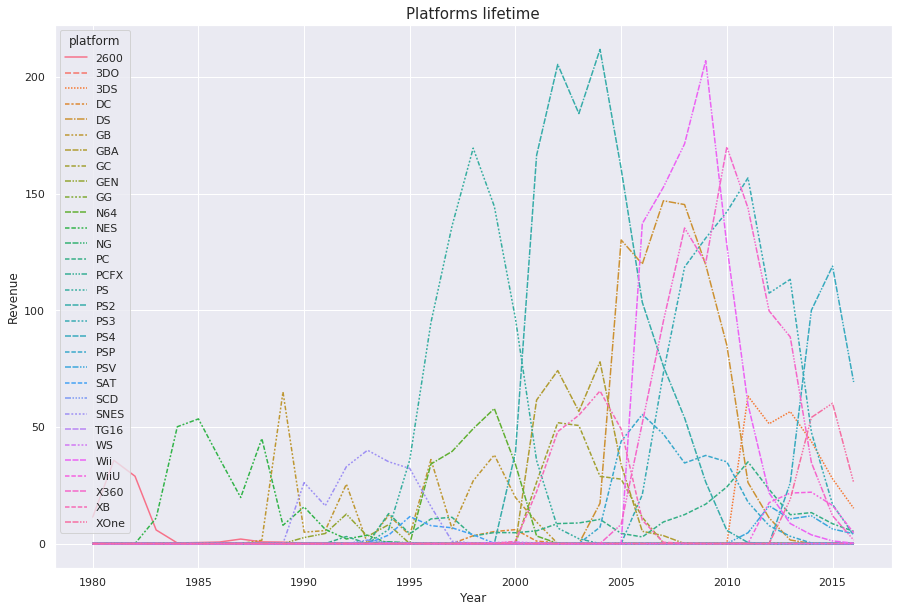

In [13]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=df_lifetime)
plt.ylabel('Revenue')
plt.xlabel('Year')
plt.title('Platforms lifetime', size=15);

**Comment:**
*This graph shows a platform lifetime from first sales to oblivion. We can see that on average popular platforms "live" for about 10 years before they fade away.*

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
  I like that you use a variety of charts in your research. </div>       

#### Choosing relevant data for analysis

In [14]:
good_data=data[data.year_of_release>=2013]

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

The ideal period would be 2014-2016 or 2015-2016 or 2013- 2016 - that is, a period of 2-3 years, including the data for 2016.
A period of 4-5 years including or excluding data for 2016 is considered acceptable.
    
If a student took a period of more than 5 years - this is a gross mistake and a red comment.
    
Message to the student: "It is uncommon to use data for more than 2-3 years when forecasting next year's sales, even in case of traditional businesses.   And in the dynamic computer games industry, taking longer time intervals should be avoided as it will definitely lead to tracking some obsolete trends. But you shouldn't take too short a period either."
    
If a student took a period of 4-5 years, we write the same text in a yellow comment.
    
Deleting the data for 2016 is not considered a gross mistake - at least the student read the text of the assignment till the end and tried to put what he read into practice.
    
But there should be the following note in a yellow comment: "Usually, the forecast for the next year is made in October, when the current year is not yet closed.At the same time, the data of the current year is not deleted, since it contains the most recent information, albeit not complete. Therefore, it is better to leave 2016 in the dataset for further analysis."
  
    


</div>

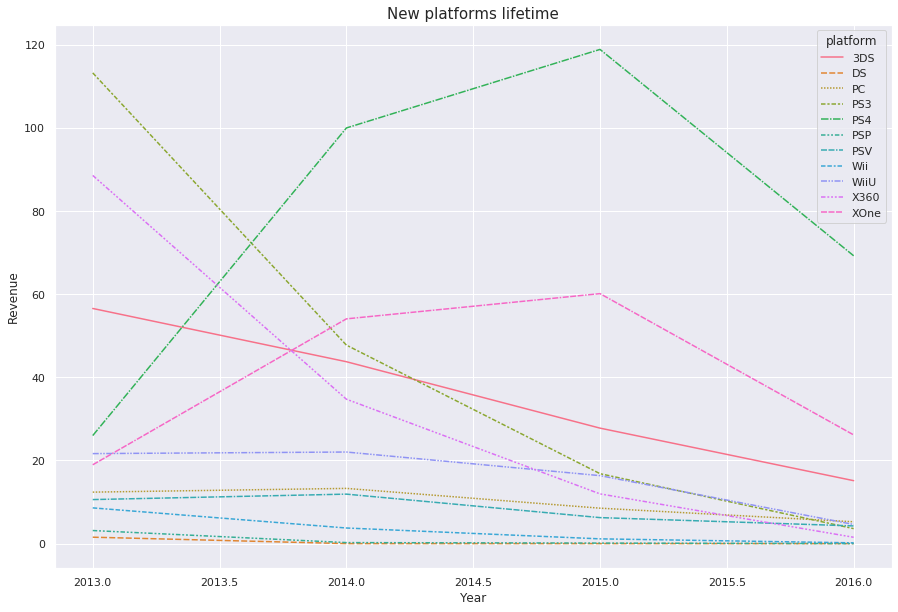

In [15]:
df_lifetime_new=pd.pivot_table(
    good_data, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=df_lifetime_new)
plt.ylabel('Revenue')
plt.xlabel('Year')
plt.title('New platforms lifetime', size=15);

**Comment:**
*This graph shows platforms revenue over time within the chosen period, i.e. 2013-2016. We can see that revenue of all platforms is declining.*

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

Also student can plot different plots for platforms.
  
    


</div>

In [16]:
#Reviewer's code
import plotly.express as px
plot_data = good_data.groupby(['year_of_release', 'platform']).agg({'total_sales':'sum'}).reset_index()

fig = px.line(plot_data, x="year_of_release", y="total_sales", color='platform', title="New platforms lifetime")
fig.show()

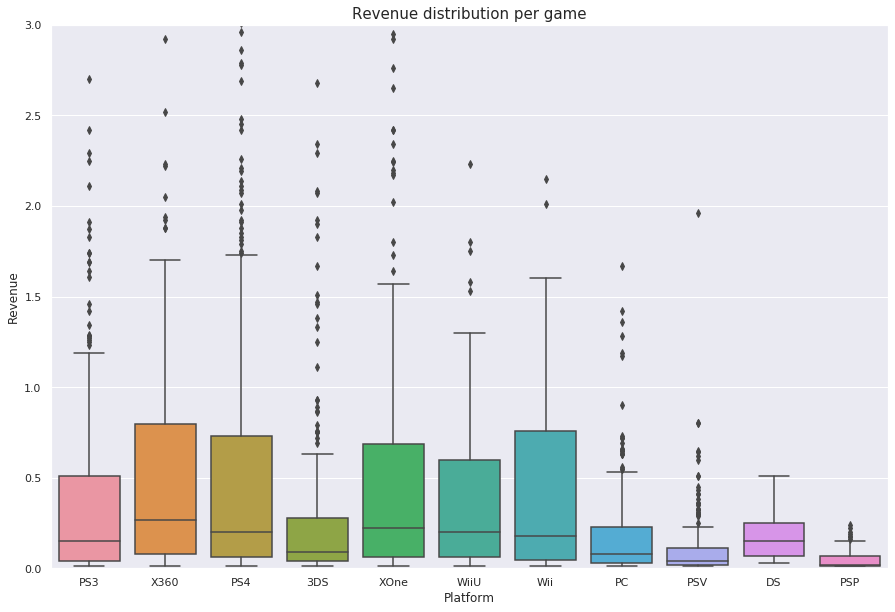

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x='platform', y='total_sales', data=good_data)
plt.ylim(0,3)
plt.ylabel('Revenue')
plt.xlabel('Platform')
plt.title('Revenue distribution per game', size=15);

**Comment:**
*Here we can see revenue distribution per game for each platform. The most perspective platforms as per graph are PS3, PS4, WiiU, Wii, X360 and XOne.*

#### Finding correlation between sales and ratings

In [18]:
PS4_df = good_data.groupby(
    ['platform','name'])['total_sales','critic_score','user_score'].sum(
).query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index(
)

In [19]:
PS4_df['total_sales'].corr(PS4_df['critic_score'])

0.4058948014583666

Positive correlation between Revenue and critics' rating for PS4


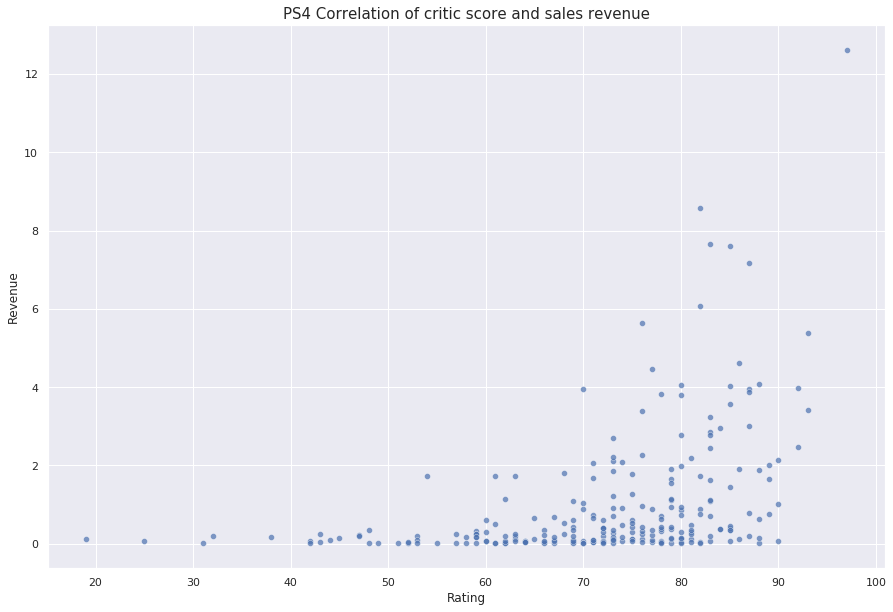

In [20]:
print("Positive correlation between Revenue and critics' rating for PS4")
plt.figure(figsize=(15,10))
sns.scatterplot(x="critic_score", y="total_sales", data=PS4_df, alpha=0.7)
plt.ylabel('Revenue')
plt.xlabel('Rating')
plt.title('PS4 Correlation of critic score and sales revenue', size=15);

In [21]:
PS4_df['total_sales'].corr(PS4_df['user_score'])

-0.03362497596528893

A weak negative correlation between Revenue and users' rating for PS4


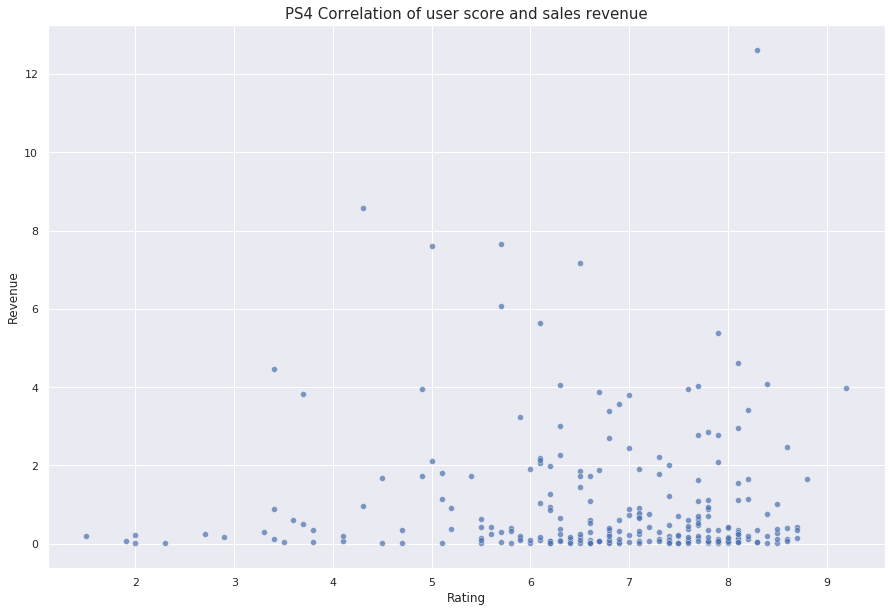

In [22]:
print("A weak negative correlation between Revenue and users' rating for PS4")
plt.figure(figsize=(15,10))
sns.scatterplot(x="user_score", y="total_sales", data=PS4_df, alpha=0.7)
plt.ylabel('Revenue')
plt.xlabel('Rating')
plt.title('PS4 Correlation of user score and sales revenue', size=15);

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Wonderful visualization! 😊  Yep, the platform PS4 is the most popular.</div>

In [23]:
X360_df = good_data.groupby(
    ['platform','name'])['total_sales','critic_score','user_score'].sum(
).query('platform == "X360" & critic_score > 0 & user_score > 0').reset_index(
)

In [24]:
X360_df['total_sales'].corr(X360_df['critic_score'])

0.3503445460228664

Positive correlation between Revenue and critics' rating for X360


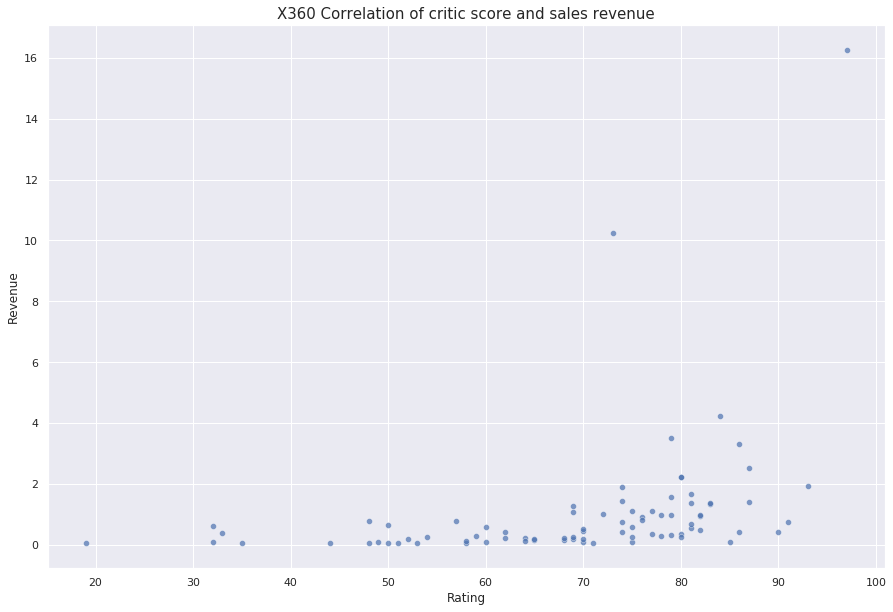

In [25]:
print("Positive correlation between Revenue and critics' rating for X360")
plt.figure(figsize=(15,10))
sns.scatterplot(x="critic_score", y="total_sales", data=X360_df, alpha=0.7)
plt.ylabel('Revenue')
plt.xlabel('Rating')
plt.title('X360 Correlation of critic score and sales revenue', size=15);

In [26]:
X360_df['total_sales'].corr(X360_df['user_score'])

-0.006238179532306349

A weak positive correlation between Revenue and users' rating for X360


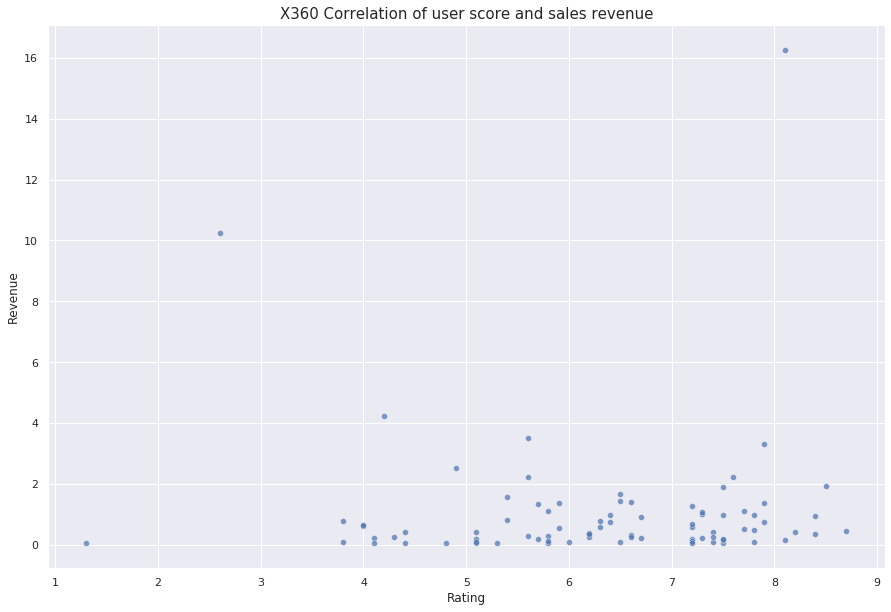

In [27]:
print("A weak positive correlation between Revenue and users' rating for X360")
plt.figure(figsize=(15,10))
sns.scatterplot(x="user_score", y="total_sales", data=X360_df, alpha=0.7)
plt.ylabel('Revenue')
plt.xlabel('Rating')
plt.title('X360 Correlation of user score and sales revenue', size=15);

In [84]:
def corr_func(platform):
    data=good_data[good_data['platform'] == platform]
    corr=good_data[good_data['platform'] == platform]\
    [['critic_score', 'user_score', 'total_sales']].corr()['total_sales']
    data.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.7, grid=True)
    plt.title(platform)
    data.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.7, grid=True)
    plt.title(platform)
    print(platform, corr)
    print('-----')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


PS4 critic_score    0.41
user_score     -0.03
total_sales     1.00
Name: total_sales, dtype: float64
-----


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


WiiU critic_score   0.38
user_score     0.42
total_sales    1.00
Name: total_sales, dtype: float64
-----
XOne critic_score    0.42
user_score     -0.07
total_sales     1.00
Name: total_sales, dtype: float64
-----


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

PS3 critic_score   0.33
user_score     0.00
total_sales    1.00
Name: total_sales, dtype: float64
-----
X360 critic_score    0.35
user_score     -0.01
total_sales     1.00
Name: total_sales, dtype: float64
-----


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Wii critic_score    nan
user_score     0.68
total_sales    1.00
Name: total_sales, dtype: float64
-----


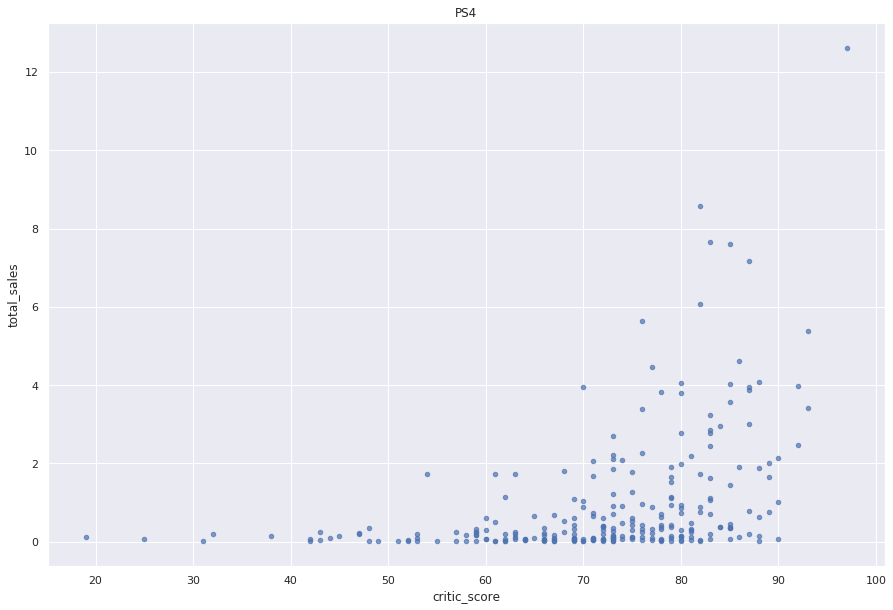

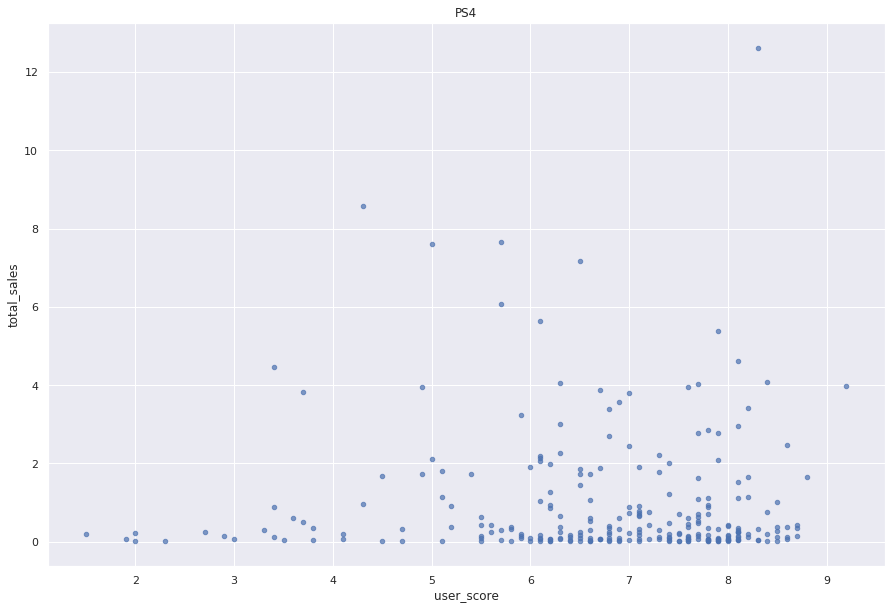

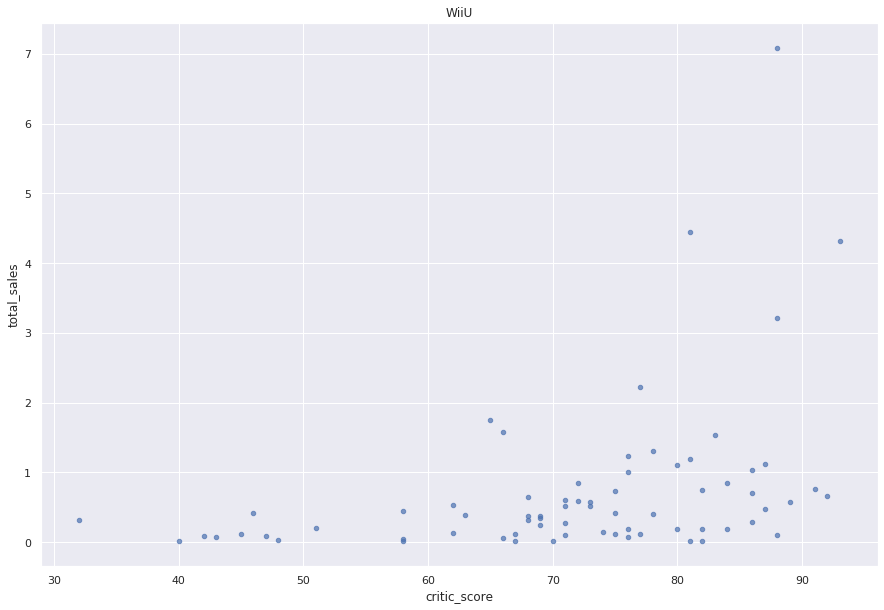

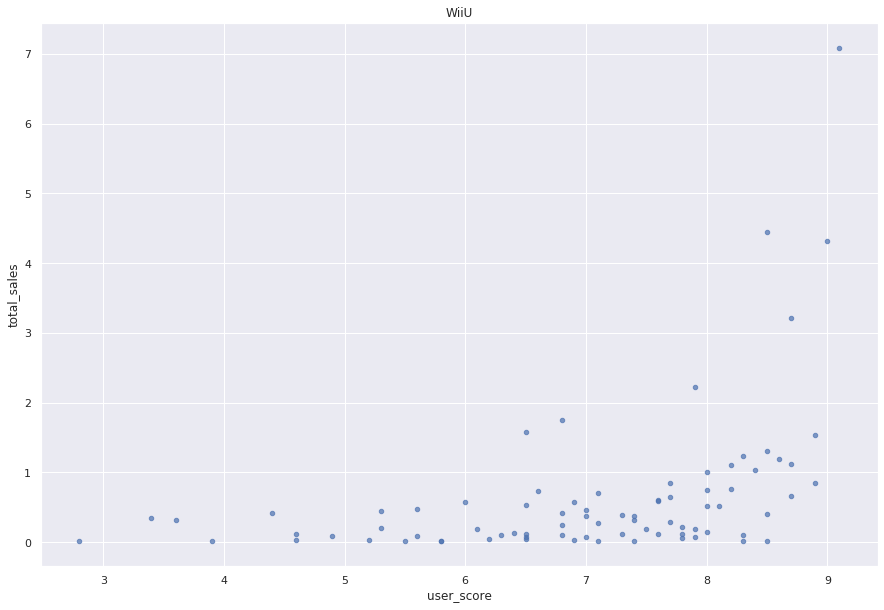

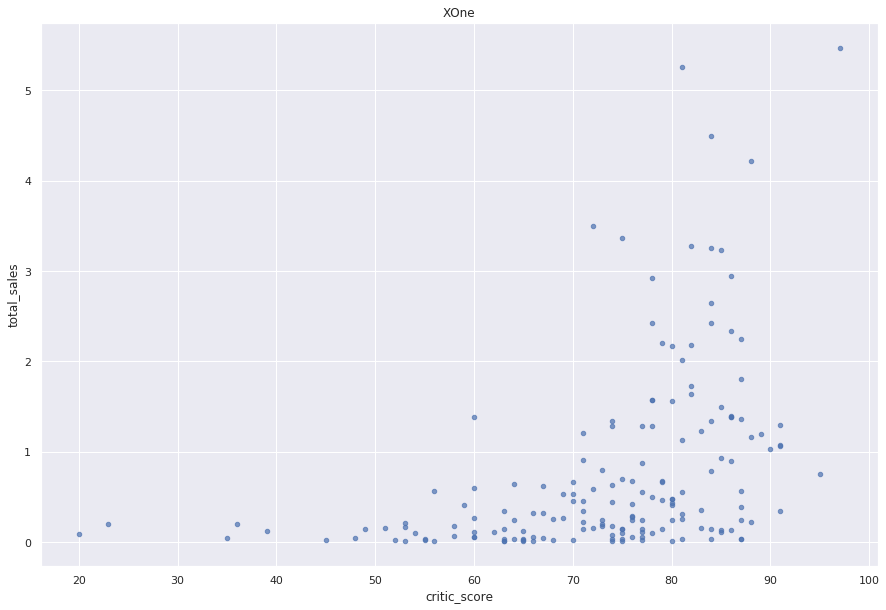

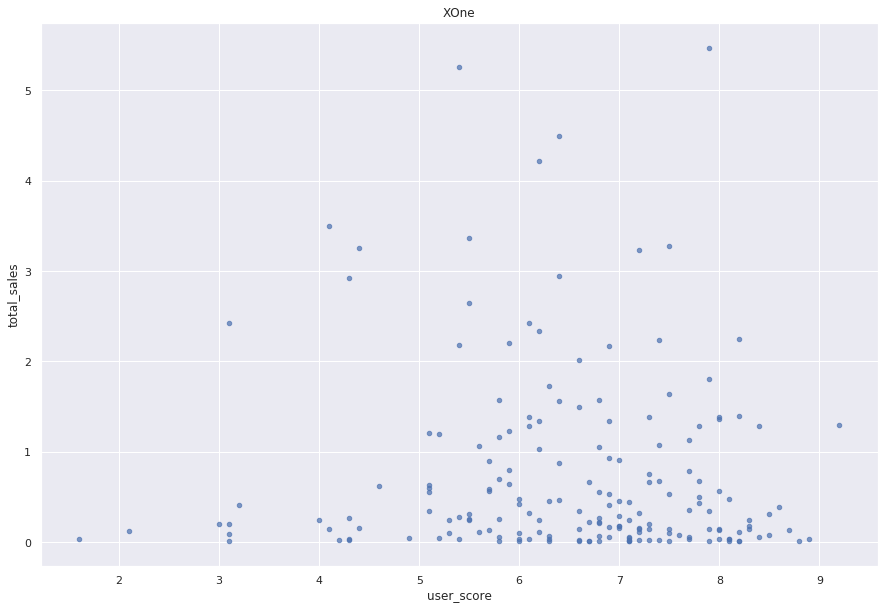

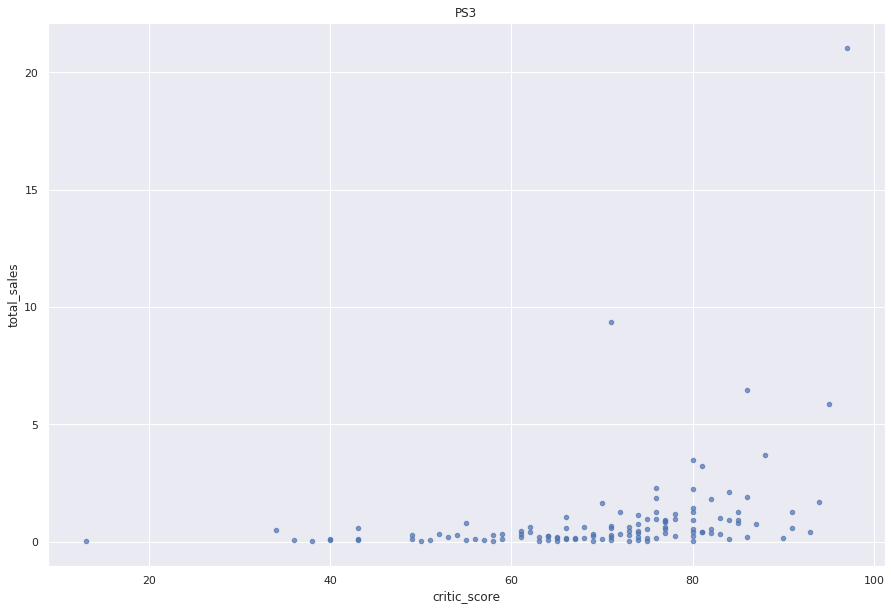

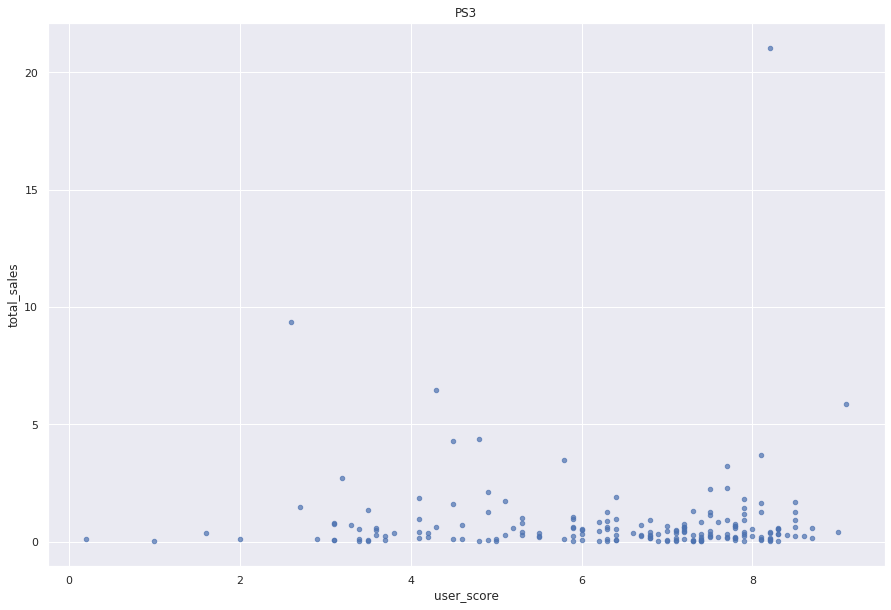

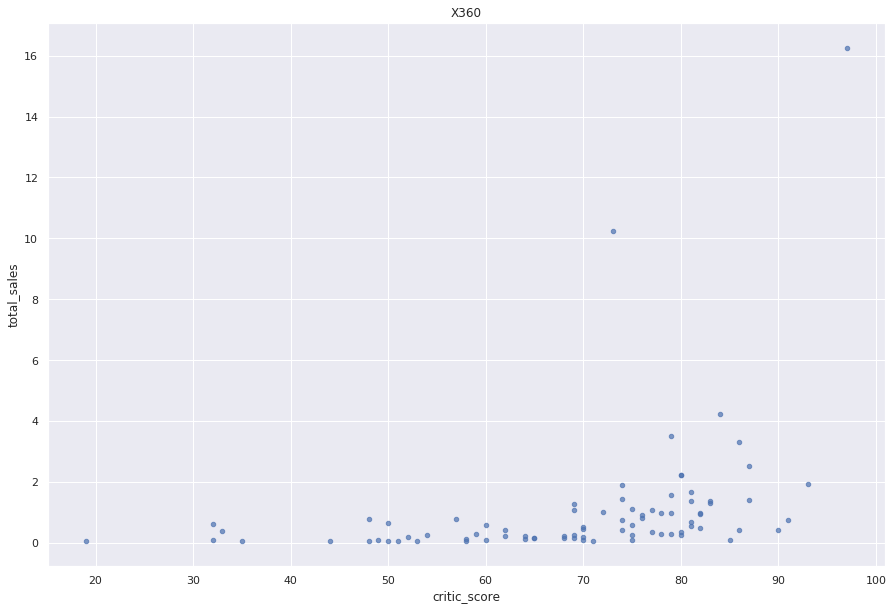

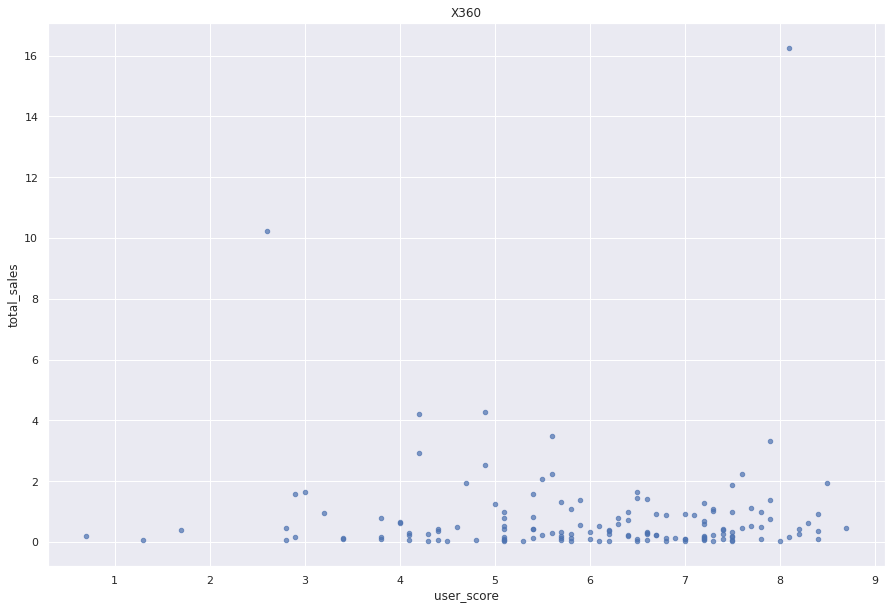

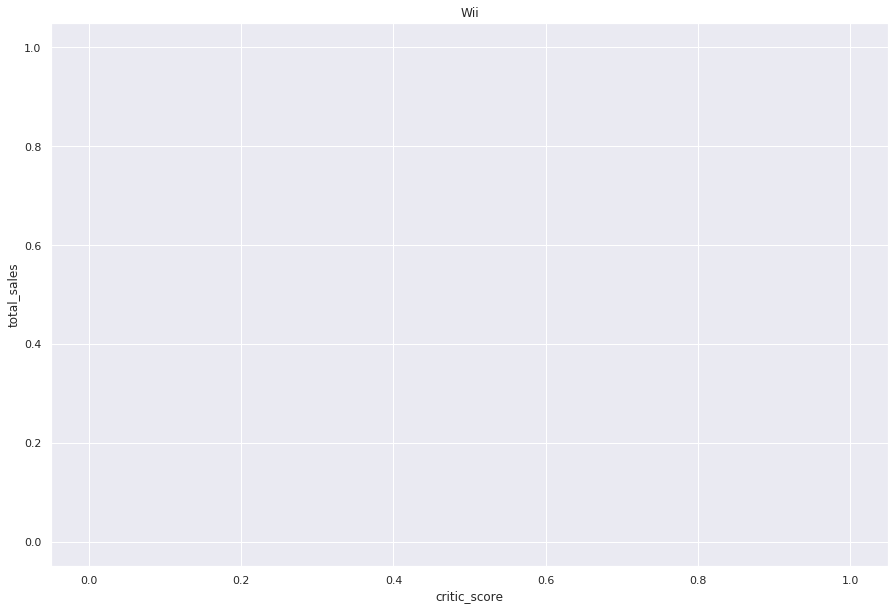

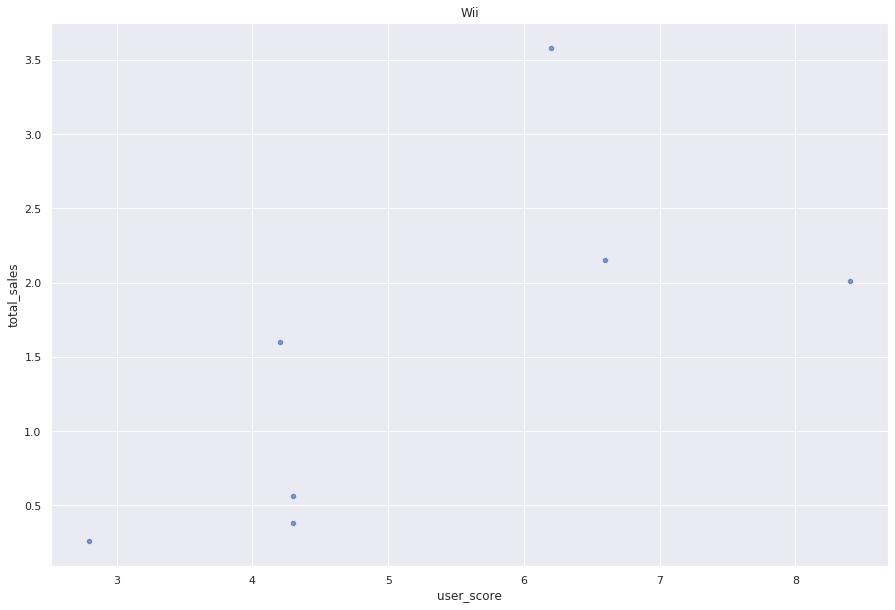

In [85]:
platforms = ['PS4', 'WiiU', 'XOne', 'PS3', 'X360', 'Wii']
for i in platforms:
    corr_func(i)

#### Finding out how revenue is affected by genre

Almost all genres show good sales revenue


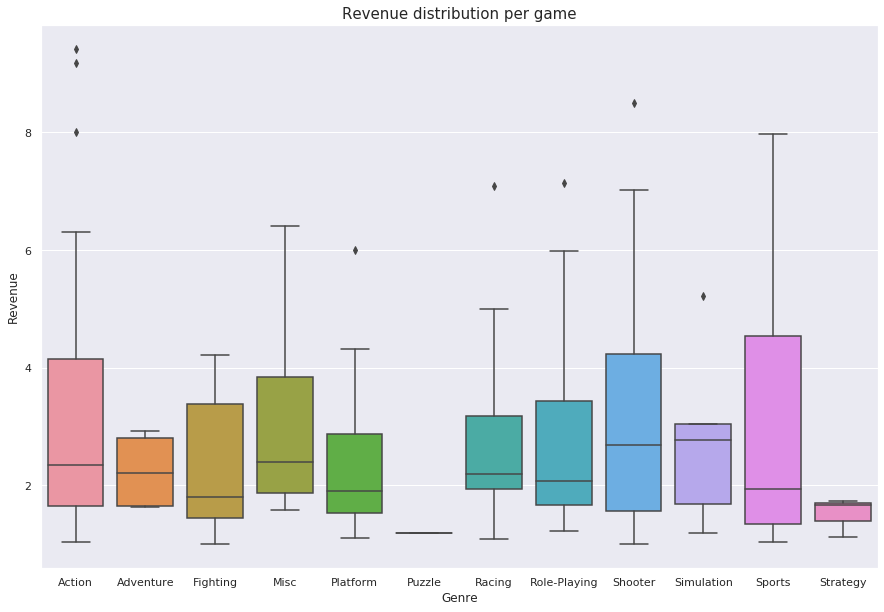

In [30]:
print('Almost all genres show good sales revenue')
df_genre=good_data.groupby(['genre','name'])['total_sales'].sum().reset_index()
df_genre=df_genre.query('1<total_sales<10')
plt.figure(figsize=(15,10))
sns.boxplot(x='genre', y='total_sales', data=df_genre)
plt.ylabel('Revenue')
plt.xlabel('Genre')
plt.title('Revenue distribution per game', size=15);

#### Conclusion

First we looked at game releases per year. We built a histogram and see that the distribution is skewed to the left. No wonder as the game industry began to grow rapidly in late 90’s.

We grouped the data by platform and total revenue and calculated a z_score which shows for each platform how far total revenue is from the overall mean in terms of standard deviation. Then we built a graph showing the distribution of revenue for all the platforms.

We also created a dataset showing a platform lifetime from the first sales to oblivion and built a lineplot showing this lifetime. We can see that on average a platform “lives” about 10 years before it completely fades away. Still that's a large period for decided to take the last ten years of data into consideration for our project as it will include all the relevant platforms.

Using a lineplot for selected data we can see that the leading platforms in the last few years were PS3, PS4, XOne, X360 and 3DS. However, the graph shows that sales revenue for all platforms is declining.

We built a boxplot based on selected data grouped by name and platform in order to determine how revenue is distributed across platforms. We found out that the platforms we chose previously are indeed the leading ones with higher total revenues and higher mean values than the rest. Except for WiiU platform that apparently has major outliers, namely Super Mario series which brought outstanding revenues to the platform in middle 2010’s.

We chose two popular platforms - PS4 and X360 - to see how critic and user rating can affect sales. We built scatterplots for each case and we can see a robust positive correlation for critic reviews (nearly 0.4 for both platforms), i.e. higher score usually brings more revenue. However, the correlation between user score and revenue is about zero which means that sales revenue is not affected much by users’ opinion.

Finally, we built a box plot to see how revenue is distributed among genres. We cut off the revenue outliers to have a closer look. We can see that all genres except Adventure, Puzzle and Strategy show good sales and high mean values. This might be the case because genres get mixed and a single game can be assigned multiple genres, like Action-Fighting or Simulation-Racing games.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>

Great job! Especially impressed:

- typical lifespan you determine correctly
    
- z-score for the determining of the most popular platforms for the whole period
    
- you have the titles and axes captions for all the graphs
  
    
    
    
Thank you for in-depth analysis and logical conclusions! </div>

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

For example, seeing that the correlation coefficient between sales and user ratings is "-0.05", a student can write: "there is a weak negative correlation between sales and user ratings".
    
Pay attention to this and explain how to interpret such values correctly.
    
Having put a unreal value when processing gaps, students forget to exclude it from the graphs and correlation calculation.
An example of graphs and calculations containing an error is given in the cell below.
    
As a result, they receive distorted calculations.You need to get them to filter these values.
    
A student might analyze of only 1 platform - in this case, draw his attention to the next item of the task: "Relate the conclusions with game sales on other platforms."
    
You could also mention that the conclusions drawn on the basis of calculations for several platforms look "weighty" and more convincing.

    
Often students look only at the total sales of games by genre and conclude that Action is the most profitable genre.
This is a gross mistake, red comment.
    
Get the student to study average/median sales: "Total sales are a poor metric for finding the most profitable genre.
High overall sales figures can hide a lot of small games with low sales.
    
Or 2-3 stars and a bunch of failures.
It would be better to find a genre of games that consistently generate high revenue; to do so, you should consider average or median sales."
  
    


</div>

### Creating a user profile for each region

In [31]:
na_platform=good_data.groupby(
    ['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False
)
jp_platform=good_data.groupby(
    ['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False
)
eu_platform=good_data.groupby(
    ['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False
)
na_platform.sum()
na_platform.head()
eu_platform.sum()
eu_platform.head()
jp_platform.sum()
jp_platform.head()

platform    PS4XOneX360PS33DSWiiUPCWiiPSVDSPSP
na_sales                                437.71
dtype: object

platform  na_sales
4       PS4    108.74
10     XOne     93.12
9      X360     81.66
3       PS3     63.50
0       3DS     38.20

platform    PS4PS3XOneX3603DSPCWiiUPSVWiiDSPSP
eu_sales                                392.23
dtype: object

platform  eu_sales
4       PS4    141.09
3       PS3     67.81
10     XOne     51.59
9      X360     42.52
0       3DS     30.96

platform    3DSPS3PSVPS4WiiUPSPX360XOneWiiDSPC
jp_sales                                140.78
dtype: object

platform  jp_sales
0      3DS     67.81
3      PS3     23.35
6      PSV     18.59
4      PS4     15.96
8     WiiU     10.88

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
  For a clearer analysis of the game market in different regions it is better to use charts. For example, you can add pie plots or bar plots :)</div> 

In [32]:
na_genre=good_data.groupby(
    ['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
jp_genre=good_data.groupby(
    ['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
eu_genre=good_data.groupby(
    ['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
na_genre.head()
eu_genre.head()
jp_genre.head()

genre  na_sales
0         Action    126.05
8        Shooter    109.74
10        Sports     65.27
7   Role-Playing     46.40
3           Misc     27.49

genre  eu_sales
0         Action    118.13
8        Shooter     87.86
10        Sports     60.52
7   Role-Playing     36.97
6         Racing     20.19

genre  jp_sales
7  Role-Playing     51.04
0        Action     40.49
3          Misc      9.20
2      Fighting      7.65
8       Shooter      6.61

In [33]:
good_data.groupby(['rating'])[['na_sales','eu_sales','jp_sales']].agg('sum').sort_values(by='na_sales', ascending=False)


na_sales  eu_sales  jp_sales
rating                              
M         165.21    145.32     14.11
E          79.05     83.36     15.14
E10+       54.24     42.69      5.89
T          49.79     41.95     20.59

#### Conclusion

We created multiple dataframes to see the top players on each market in terms of platform, genre and rating.

First of all we looked at platforms and see that revenue is not equally distributed across the regions: NA brought 438 million to game developers in the respective period which is 3 times more than Japan. We can see that PS3 is doing better in EU region than in NA region and that XBox is not in top five in Japan. This might be because the market is special and relatively small and doesn't respond to global trends. We can see that top five platforms in Japan are originally local brands: Sony and Nintendo.

Secondly, we looked at top five genres for each region and again NA and EU look alike except for the fifth place: Misc. (NA) vs. Racing (EU). Japan top five genres have Role-playing on top, Action is second and Shoter's the last.

Finally, the ESRB rating for NA and EU regions are the same - "M", "E", "E10+", "T". This means that for these two regions the age of players has similar distribution.
In Japan however the revenue distribution differs - "T" is on the 1st place, than "E" and "M". 

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Technically everything is correct here, I really like your detailed conclusions, but due to the fact that the period previously selected was not actual, the platforms here are not quite up to date. As soon as you fix the actual period, everything will be okay here. Can you please write here your guesses as to what may be related similarities and differences in the most popular platforms in different regions?</div>  

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

Common gross mistake, red comment: Students don't replace gaps in the rating column with a unreal value and end up losing the entire data on unrated games.
    
Message to the student: "Using this method of calculation, you completely excluded unrated games from the analysis.
But the sales of these particular games may indicate a key difference between regions.
    
Students can be given the following advice:
    
if the graph for each region is built by a separate line of code - plot 3 graphs side by side using subplots;
    
if subplots is successfully applied - check if there is a "two level header" - both for all three graphs together, and for each of the three separately;
    
when analyzing platforms and genres, everything that is not included in the TOP-5? should be combined into "others" - so that the analysis picture is more complete.
    
Average user ratings for Action and Sports are different

  
    


</div>

### Hypotheses testing

#### Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same

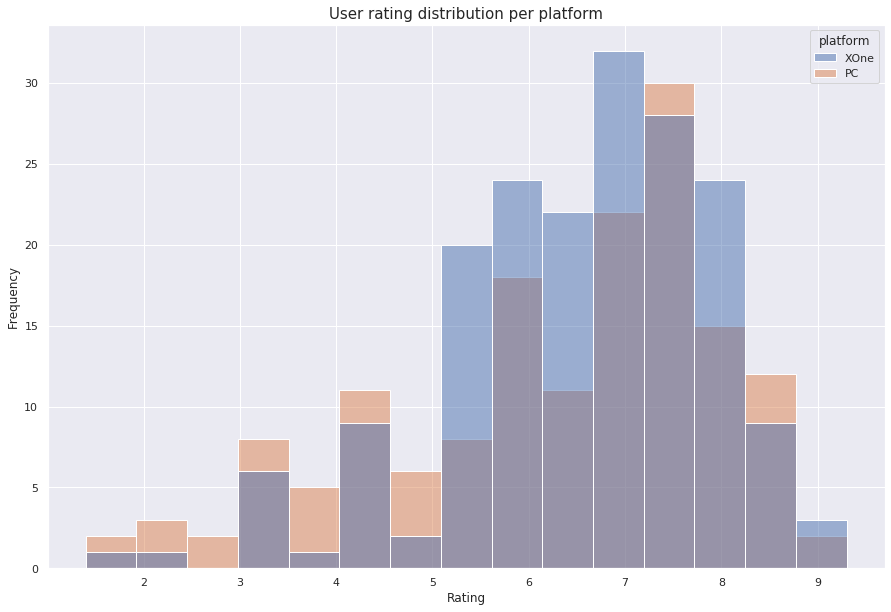

In [34]:
hyp_data = good_data.query('user_score > 0 & platform == "XOne" or user_score > 0 & platform == "PC"')
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(hyp_data,x='user_score',hue='platform')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('User rating distribution per platform', size=15);

In [35]:
#Reviewer's code
hyp_data[(hyp_data['platform'] == 'PC') & (hyp_data['user_score'] == 0)]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, total_sales]
Index: []

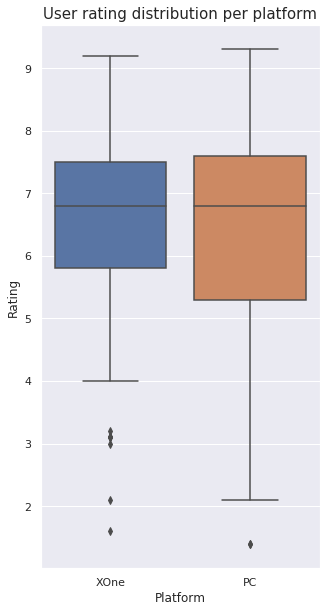

In [36]:
fig, ax = plt.subplots(figsize=(5,10))
ax = sns.boxplot( x='platform',y='user_score', data=hyp_data)
plt.ylabel('Rating')
plt.xlabel('Platform')
plt.title('User rating distribution per platform', size=15);

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>

 It's great that you visualized the sample distributions!  </div>

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

Graphs is an option.

  
    


</div>

In [37]:
hyp_data.groupby(['platform'])['user_score'].agg('mean')

platform
PC     6.27
XOne   6.52
Name: user_score, dtype: float64

In [38]:
XOne_df = hyp_data.query('platform == "XOne"')
PC_df = hyp_data.query('platform == "PC"')

**We formulate the hypotheses as follows:**

 - Null-hypothesis: There are no statistically significant differences between the average user ratings of Xbox One and PC platforms;
 - Alternative hypothesis: The differences between average user ratings of the Xbox One and PC platforms are statistically significant.

*We choose alpha parameter equal **5%** as a standart threshold for our kind of business.*

In [39]:
alpha=0.05

In [40]:
p_value_levene=stats.levene(XOne_df['user_score'], PC_df['user_score']).pvalue
if p_value_levene<alpha:
    print('Reject H0: variance of sample 1 is not equal to variance of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that variances of sample 1 and sample 2 are not the same") 

Reject H0: variance of sample 1 is not equal to variance of sample 2


In [41]:
p_value=stats.ttest_ind(XOne_df['user_score'], PC_df['user_score'], nan_policy='omit', equal_var=False).pvalue
if p_value<alpha:
    print("Reject H0: There are statistically significant differences between the average average user ratings of Xbox One and PC platforms.")
else:
    print("Fail to Reject H0: We don't have enough evidence to say that the difference between average user ratings of the Xbox One and PC platforms is statistically insignificant.")
p_value

Fail to Reject H0: We don't have enough evidence to say that the difference between average user ratings of the Xbox One and PC platforms is statistically insignificant.


0.14759594013430463

#### Hypothesis 2: Average user ratings for the Action and Sports genres are the same

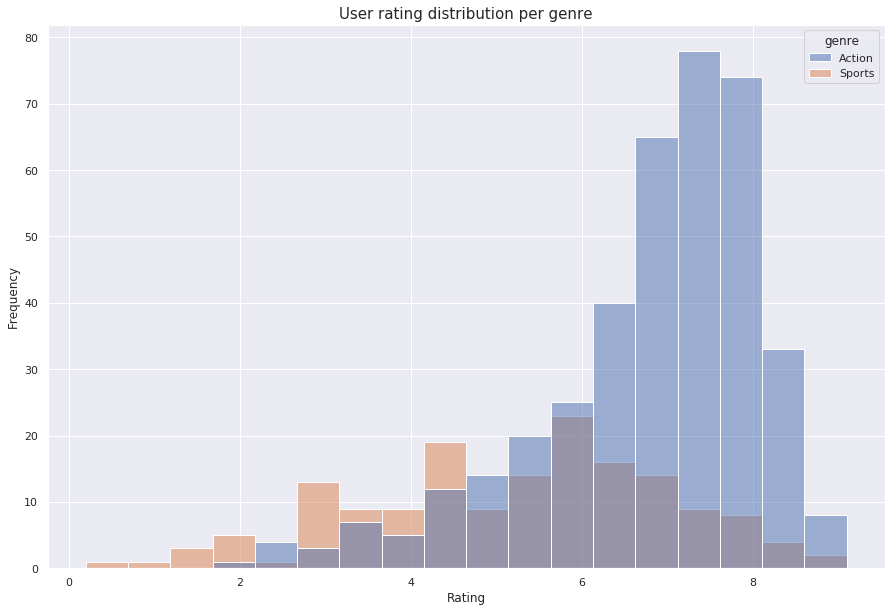

In [42]:
hyp_data2 = good_data.query('user_score > 0 & genre == "Sports" or user_score > 0 & genre == "Action"')
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(hyp_data2,x='user_score',hue='genre')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('User rating distribution per genre', size=15);

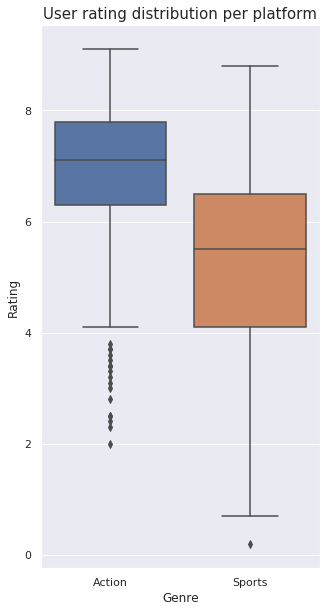

In [43]:
fig, ax = plt.subplots(figsize=(5,10))
ax = sns.boxplot( x='genre',y='user_score', data=hyp_data2)
plt.ylabel('Rating')
plt.xlabel('Genre')
plt.title('User rating distribution per platform', size=15);

In [44]:
hyp_data2.groupby(['genre'])['user_score'].agg('mean')

genre
Action   6.84
Sports   5.24
Name: user_score, dtype: float64

In [45]:
Sports_df = hyp_data2.query('genre == "Sports"')
Action_df = hyp_data2.query('genre == "Action"')

**We formulate the hypotheses as follows:**

 - Null-hypothesis: Average user ratings for the Action and Sports genres belong to the same statistical population;
 - Alternative hypothesis: Average user ratings for the Action and Sports genres do not belong to the same statistical population.

*We choose alpha parameter equal **5%** as a standart threshold for our kind of business.*

In [46]:
alpha=0.05

In [47]:
p_value_levene=stats.levene(Sports_df['user_score'], Action_df['user_score']).pvalue
if p_value_levene<alpha:
    print('Reject H0: variance of sample 1 is not equal to variance of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that variances of sample 1 and sample 2 are not the same") 

Reject H0: variance of sample 1 is not equal to variance of sample 2


In [48]:
p_value=stats.ttest_ind(Sports_df['user_score'], Action_df['user_score'], nan_policy='omit', equal_var=False).pvalue
if p_value<alpha:
    print("Reject H0: Average user ratings for the Action and Sports genres do not belong to the same statistical population.")
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that average user ratings for the Action and Sports genres belong to different statistical populations.")
p_value

Reject H0: Average user ratings for the Action and Sports genres do not belong to the same statistical population.


1.4460039700704315e-20

#### Conclusion

We formulated and run the tests on both hypotheses and see that in the first case we failed to reject the null-hypothesis and in the second case we rejected the null-hypothesis.

<div class="alert alert-block alert-info">
<b>Senior Reviewer's comment </b> <a class="tocSkip"></a>

Students do not formulate hypotheses / formulate only 1 hypothesis / formulate hypotheses incorrectly.
    
They try to apply the criterion for one sample st.ttest_1samp to two samples.
    
They don't remove gaps (if there are any left) - get results.pvalue equal to NaN.
    
Students do not remove unreal values (if they were entered) - and get errors in calculations.
    
The Equal_Var parameter is not set based on the calculation of dispersions. The approach has changed, we do not require it anymore.
    
They conclude that the tests "confirm" one of the hypotheses - it is impossible to confirm the hypothesis in statistics.
They don't output results.pvalue, so if it's calculated incorrectly (e.g. equals to NaN) it will not be visible.
Samples are "averaged" beforehand: for example, 500 values are selected from each, trying to bring both samples to the same size.
    
You should write that equality of sample sizes is not required for testing hypotheses, moreover, it is more common to use samples that are not equal in size.

  
    


</div>

### Overall conclusion

**Working on the dataset**

Our goal was to study the data, analyze the aspects affecting sales revenue of games in order to spot potential winners. We've got a dataset that contained name of the game, year of release, platform, genre, sales revenue in different regions and different ratings. We examined the datasets and discovered some weired data and some missing data.

**Data preprocessing**

We lowered the case for headers and changed data type for Year_of_release column.
We dealt with the missing values in the following way:

   *Year_of_release*: We don't have many missing values here so we changed them to zero as it doesn't affect the results of our analysis.
   
   *Critic_score*: we looked for games with same names but missing score and filled it. We changed the rest to zero as there's nothing we can do to fill it in.
   
   *User_score*: again we looked for games with same names but missing score and filled it. However here we had to first create a separate dataframe that would not contain 'tbd' values. As well as we did previously, we changed the rest of 'NaN' and 'tbd' values to zero as there's nothing we can do to fill them in.

We leave the other missing values as they are because those are object data types that we can not fill in. Still they might not have any visible impact on the results of our analysis.

Finally we calculated Total_sales column as requested.

**Making calculations**

First we looked at game releases per year. We built a histogram and see that the distribution is skewed to the left. No wonder as the game industry began to grow rapidly in late 90’s.

We grouped the data by platform and total revenue and calculated a z_score which shows for each platform how far total revenue is from the overall mean in terms of standard deviation. Then we built a graph showing the distribution of revenue for all the platforms.

We also created a dataset showing a platform lifetime from the first sales to oblivion and built a lineplot showing this lifetime. We can see that on average a platform “lives” about 10 years before it completely fades away and decided to take the last ten years of data into consideration for our project as it will include all the relevant platforms.

Using a lineplot for selected data we can see that the leading platforms in the last few years were PS3, PS4, XOne, X360 and 3DS. However, the graph shows that sales revenue for all platforms is declining.

We built a boxplot based on selected data grouped by name and platform in order to determine how revenue is distributed across platforms. We found out that the platforms we chose previously are indeed the leading ones with higher total revenues and higher mean values than the rest. Except for WiiU platform that apparently has major outliers, namely Super Mario series which brought outstanding revenues to the platform in middle 2010’s.

We chose two popular platforms - PS4 and X360 - to see how critic and user rating can affect sales. We built scatterplots for each case and we can see a robust positive correlation for critic reviews (nearly 0.4 for both platforms), i.e. higher score usually brings more revenue. However, the correlation between user score and revenue is about zero which means that sales revenue is not affected much by users’ opinion.

Finally, we built a box plot to see how revenue is distributed among genres. We cut off the revenue outliers to have a closer look. We can see that all genres except Adventure, Puzzle and Strategy show good sales and high mean values. This might be the case because genres get mixed and a single game can be assigned multiple genres, like Action-Fighting or Simulation-Racing games.

**Creating a user profile for each region**

First of all we looked at platforms and see that revenue is not equally distributed across the regions: NA brought 438 million to game developers in the respective period which is 3 times more than Japan. We can see that PS3 is doing better in EU region than in NA region and that XBox is not in top five in Japan. This might be because the market is special and relatively small and doesn't respond to global trends. We can see that top five platforms in Japan are originally local brands: Sony and Nintendo.

Secondly, we looked at top five genres for each region and again NA and EU look alike except for the fifth place: Misc. (NA) vs. Racing (EU). Japan top five genres have Role-playing on top, Action is second and Shoter's the last.

Finally, the ESRB rating for NA and EU regions are the same - "M", "E", "E10+", "T". This means that for these two regions the age of players has similar distribution.
In Japan however the revenue distribution differs - "T" is on the 1st place, than "E" and "M". 

**Testing hypotheses**

We formulated and tested the following hypotheses:
1. Average user ratings of the Xbox One and PC platforms are the same.
2. Average user ratings for the Action and Sports genres are the same.

We chose alpha parameter equal to 5% as it is a standard for this type of busines and everything falling below this threshold can be considered accidential.

As a result we failed to reject the first null-hypothesis meaning ***we don't have enough evidense to state whether the average user ratings of the Xbox One and PC platforms are not the same.***

And the second null-hypothesis was rejected which means that in the second case ***the average user ratings for the Action and Sports genres are not the same.***

**Our conclusion**

We can draw the following conclusions:
1. The lifetime of a platform is about 10 years;
2. The most profitable platforms in the chosen period are those made by Microsoft, Sony and Nintendo;
3. Sales revenue usually depends on critics' score and does not depend on users' opinion;
4. The trending genres are Action, Shooter, Sports and Role-playing;
5. In order to succeed the ESRB rating must be either "E" or "M".

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
   I like that you wrote such in-depth conclusions on the whole study, proved them with numbers and made logical assumptions. Thank you for your work! It's really great! 👏👏👏</div> 